In [26]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

import numpy as np
import pywt
from sklearn.decomposition import PCA
from math import log10, sqrt 
from sklearn.cluster import KMeans
from scipy.fftpack import dct, idct
import os
from skimage import io
from skimage import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [45]:
#define psnr, mse, ssim and compressRatio
def psnr(img, compressed):
    return metrics.peak_signal_noise_ratio(image,compressed)
def mse(img, compressed):
    return metrics.mean_squared_error(image,compressed)
def ssim(img, compressed):
    return metrics.structural_similarity(image,compressed,multichannel=True)
def compressRatio(img, compressed):
    return img/compressed

In [46]:
image = io.imread('pca_compress_150.png')

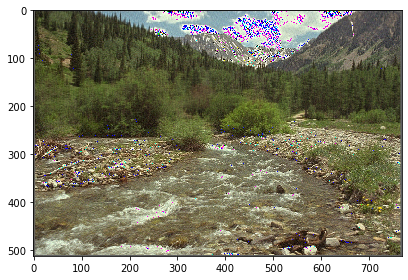

In [47]:
io.imshow(image);

In [48]:
image.shape

(512, 768, 3)

In [49]:
print(image)

[[[ 98  98 100]
  [ 98  98 100]
  [ 98  98 100]
  ...
  [ 99  98  90]
  [ 98  98 101]
  [ 98  98 100]]

 [[ 98  98 100]
  [ 98  98 100]
  [ 98  98 100]
  ...
  [ 99  98  90]
  [ 98  98 100]
  [ 98  98 100]]

 [[ 98  98 100]
  [ 98  98 100]
  [ 98  98 100]
  ...
  [ 99  98  90]
  [ 98  98 100]
  [ 98  98 100]]

 ...

 [[102 102 101]
  [102 102 101]
  [102 102 102]
  ...
  [104 100  93]
  [102 102 101]
  [102 102 101]]

 [[ 97  98 100]
  [ 97  98 100]
  [ 97  98 100]
  ...
  [ 98  98  90]
  [ 97  98 100]
  [ 97  98 100]]

 [[ 89  86  94]
  [ 89  86  94]
  [ 89  86  94]
  ...
  [ 99 100  99]
  [ 89  86  94]
  [ 89  86  94]]]


# preprocessing


In [50]:
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [51]:
print(image.shape)
print(image[:5])

(393216, 3)
[[ 98  98 100]
 [ 98  98 100]
 [ 98  98 100]
 [101  99  94]
 [ 94  93  92]]


In [52]:
# modelling
kMeans = KMeans(n_clusters =200)
kMeans.fit(image)

KMeans(n_clusters=200)

In [53]:
# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers

array([[ 46,  42,  33],
       [125, 119,  85],
       [185, 167, 131],
       [ 89,  96,  54],
       [228, 230, 222],
       [243,   2, 223],
       [  5,   5, 249],
       [158, 188, 193],
       [ 64,  65,  45],
       [153, 141, 119],
       [  2, 252, 241],
       [200, 205, 175],
       [105, 116,  58],
       [114, 122,  66],
       [101, 102,  75],
       [129, 131,  99],
       [169, 163, 136],
       [ 33,  23,   7],
       [ 72,  81,  43],
       [ 60,  47,  30],
       [ 91,  90,  76],
       [250, 249,   2],
       [122, 110,  82],
       [ 74,  73,  63],
       [239, 240, 234],
       [129, 162, 172],
       [190, 196, 172],
       [148, 148,  99],
       [107, 105,  97],
       [  4, 251,   6],
       [232, 223, 180],
       [138, 138, 105],
       [253,   2,   2],
       [103,  82,  54],
       [161, 160, 118],
       [ 83,  71,  53],
       [ 36,  36,  14],
       [ 67,  72,  21],
       [ 83,  81,  71],
       [216, 222, 191],
       [ 93, 106,  49],
       [120,  99

In [54]:
#labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
print(labels)
print(50 * '*')


(393216,)
[ 48  48  48 ...  48 188 188]
**************************************************


In [55]:
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(512, 768)


array([[ 48,  48,  48, ..., 138,  48,  48],
       [ 48,  48,  48, ..., 138,  48,  48],
       [ 48,  48,  48, ..., 138,  48,  48],
       ...,
       [ 48,  48,  48, ..., 138,  48,  48],
       [ 48,  48,  48, ..., 138,  48,  48],
       [188, 188, 188, ...,  48, 188, 188]], dtype=uint8)

In [56]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('kmeans_pca.png', newImage);

(512, 768, 3)


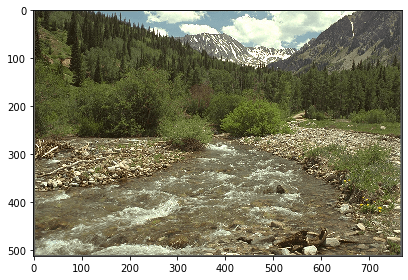

In [59]:
io.imshow(newImage);
print(newImage.shape)

In [14]:
image = io.imread('test01.png')
newImage = io.imread('d-compressed_200.png')

print ("mse, psnr, ssim and cr value")
print("mse is :",mse(image, newImage))
print("psnr is :",psnr(image, newImage))
print("compression ratio is :",compressRatio(os.path.getsize('test01.png'),os.path.getsize('d-compressed_200.png')))

print("ssim is :",ssim(image,newImage))


mse, psnr, ssim and cr value
mse is : 2.89156191369606
psnr is : 43.51947865079523
compression ratio is : 2.9443269560367415
ssim is : 0.9768007204422506


In [57]:
print(os.path.getsize('kmeans_pca.png'),'bytes')

789143 bytes
